In [1]:
%pip install qiskit qiskit-ibm-runtime --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import *

The object at the heart of Qiskit is Quantum Circuit.

This can be created using the method `QuantumCircuit()`

In [3]:
qc = QuantumCircuit()

The circuit is currently empty with no qubits and no outputs

In [4]:
qr = QuantumRegister(2, 'qreg')

Message: The line `qr = QuantumRegister(2, 'qreg')` creates a quantum register named `'qreg'` consisting of 2 qubits.

### Explanation:
- **`QuantumRegister(2, 'qreg')`**: This initializes a quantum register with 2 qubits.
- **`'qreg'`**: This is an optional name given to the register, which can help identify it when working with multiple registers.
- The variable `qr` now holds this quantum register, and you can access the individual qubits as `qr[0]` and `qr[1]`.

### Usage Example:
```python
from qiskit import QuantumRegister, QuantumCircuit

qr = QuantumRegister(2, 'qreg')  # Create a quantum register with 2 qubits named 'qreg'
qc = QuantumCircuit(qr)          # Create a quantum circuit using this register

qc.h(qr[0])                     # Apply Hadamard gate to the first qubit
qc.cx(qr[0], qr[1])             # Apply CNOT gate with control qubit 0 and target qubit 1

qc.draw(output='mpl')           # Visualize the circuit
```

This is the foundational step to define and work with qubits in Qiskit.

### Purpose of Naming a Quantum Register (`'qreg'`) Even When Accessing Qubits by Index

- **Clarity and Readability:**  
  Naming a quantum register (e.g., `'qreg'`) helps clearly identify which group of qubits you are working with, especially in circuits involving multiple registers. It makes the code easier to understand and maintain.

- **Distinguishing Multiple Registers:**  
  When you have multiple quantum registers, each with its own name, you can easily differentiate between them. For example, `qr1[0]` and `qr2[0]` refer to qubits in different registers, which is clearer than just using indices.

- **Debugging and Visualization:**  
  Named registers appear in circuit diagrams and output, making it easier to track qubits and their operations during debugging or analysis.

---

### Why Use Multiple Quantum Registers Instead of a Single Large Register?

- **Logical Separation of Qubits:**  
  Different registers can represent different logical parts of a quantum algorithm. For example, one register might hold input qubits, another ancilla (helper) qubits, and another output qubits.

- **Modularity and Reusability:**  
  Using multiple registers allows modular circuit design. You can build subcircuits or modules that operate on specific registers without affecting others.

- **Hardware Constraints and Mapping:**  
  Real quantum hardware may have constraints on qubit connectivity or grouping. Multiple registers can help map logical qubits to physical qubits more effectively.

- **Measurement and Classical Registers:**  
  Often, each quantum register corresponds to a classical register for measurement results. Keeping them separate helps manage measurement mappings clearly.

---

### Summary

- Naming quantum registers improves **code clarity**, **debugging**, and **visualization**.
- Multiple registers provide **logical organization**, **modularity**, and better **hardware mapping**.
- While you *can* put all qubits in a single register, using multiple registers is a best practice for complex quantum circuits and algorithms.

In [5]:
qc.add_register(qr)

In [6]:
qr[0]

<Qubit register=(2, "qreg"), index=0>

In [7]:
qc.qregs

[QuantumRegister(2, 'qreg')]

Message: ### What is the `qc.qregs` Attribute in Qiskit?

The `qc.qregs` attribute of a `QuantumCircuit` object in Qiskit provides information about the **quantum registers** that have been added to that circuit.

---

### Purpose of `qc.qregs`

- It is a **list** containing all the quantum registers associated with the quantum circuit `qc`.
- Each element in this list is a `QuantumRegister` object.
- It allows you to inspect which quantum registers (and thus which qubits) are part of the circuit.

---

### What Information Does `qc.qregs` Provide?

- **Number of Registers:** How many quantum registers are in the circuit.
- **Register Details:** For each register, it shows:
  - The **name** of the register (e.g., `'qreg'`).
  - The **size** (number of qubits) in that register.
- This helps in understanding the structure of the circuit, especially when multiple registers are used.

---

### Example

```python
from qiskit import QuantumRegister, QuantumCircuit

qr1 = QuantumRegister(2, 'qreg1')
qr2 = QuantumRegister(3, 'qreg2')
qc = QuantumCircuit(qr1, qr2)

print(qc.qregs)
# Output: [QuantumRegister(2, 'qreg1'), QuantumRegister(3, 'qreg2')]
```

Here, `qc.qregs` shows that the circuit contains two quantum registers named `'qreg1'` and `'qreg2'` with 2 and 3 qubits respectively.

---

### Summary

- `qc.qregs` is useful for **querying and managing** the quantum registers within a circuit.
- It provides a clear overview of the **qubit organization** inside the circuit.
- This attribute is especially helpful when working with **complex circuits** involving multiple quantum registers.

In [8]:
qc.draw()

qreg_0: 
        
qreg_1:

In [9]:
pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


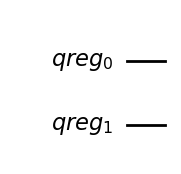

In [10]:
qc.draw(output='mpl')

In [11]:
qc.h(qr[0])

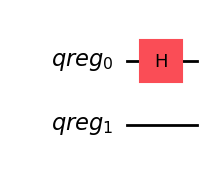

In [12]:
qc.draw(output='mpl')

In [13]:
qc.cx(qr[0], qr[1])

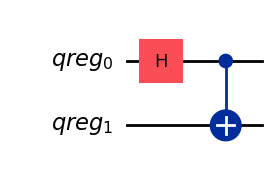

In [14]:
qc.draw(output='mpl')

In [15]:
!pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import importlib.metadata

from qiskit_aer import Aer
print(importlib.metadata.version('qiskit-aer'))

0.17.1


In [17]:
vector_sim = Aer.get_backend('statevector_simulator')

In [18]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [19]:
job = vector_sim.run(qc)

In [20]:
ket = job.result().get_statevector()
for amplitude in ket:
  print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


C:\Users\clari\AppData\Local\Temp\ipykernel_28740\1040912550.py:2: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for amplitude in ket:


In [21]:
new_qc = QuantumCircuit(qr)

In [22]:
new_qc.initialize(ket, qr)

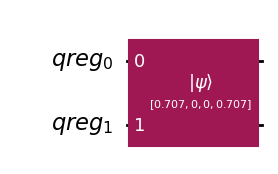

In [23]:
new_qc.draw(output='mpl')

In [24]:
cr = ClassicalRegister(2, 'creg')

In [25]:
qc.add_register(cr)

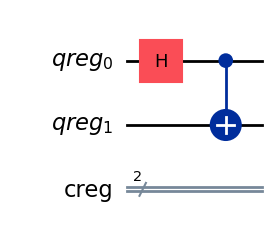

In [26]:
qc.draw(output='mpl')

In [27]:
qc.measure(qr, cr)

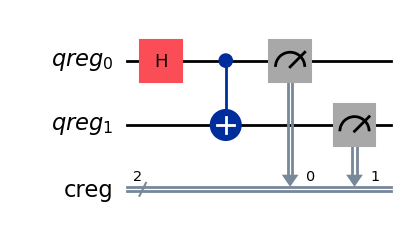

In [28]:
qc.draw(output='mpl')

In [29]:
emulator = Aer.get_backend('qasm_simulator')

In [30]:
job = emulator.run(qc, shots=8192)

In [31]:
hist = job.result().get_counts()
print(hist)

{'00': 4032, '11': 4160}


In [32]:
from qiskit.visualization import plot_histogram

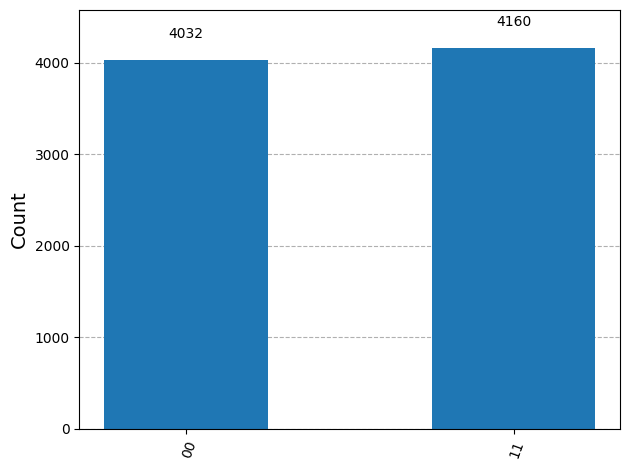

In [33]:
plot_histogram(hist)

In [34]:
qubit = QuantumRegister(8, 'qubit')

In [35]:
bit = ClassicalRegister(8, 'bit')

In [36]:
circuit = QuantumCircuit(qubit, bit)

In [37]:
circuit.x(qubit[7])

In [38]:
circuit.measure(qubit, bit)

In [39]:
emulator.run(circuit, shots=8192).result().get_counts()

{'10000000': 8192}

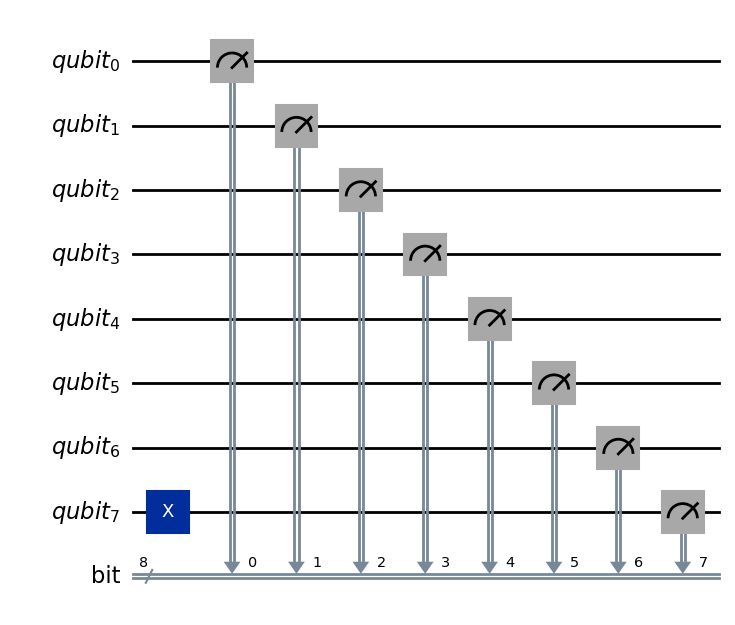

In [40]:
circuit.draw(output='mpl')

In [41]:
qc = QuantumCircuit(3)

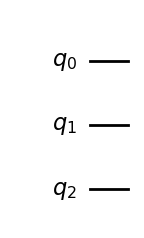

In [42]:
qc.draw(output='mpl')

In [43]:
qc.h(2)

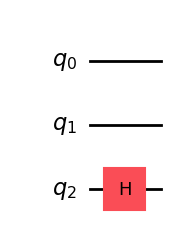

In [44]:
qc.draw(output='mpl')

In [45]:
qc = QuantumCircuit(2,2)

In [46]:
qc.h(1)

In [47]:
qc.cx(0,1)

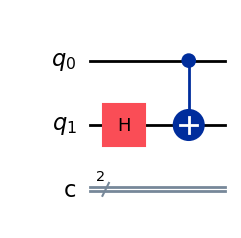

In [48]:
qc.draw(output='mpl')

In [49]:
qc.measure(1,0)

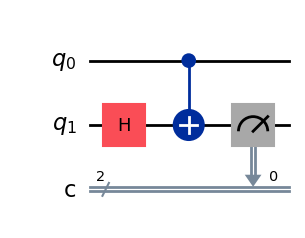

In [50]:
qc.draw(output='mpl')

In [51]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')

In [52]:
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

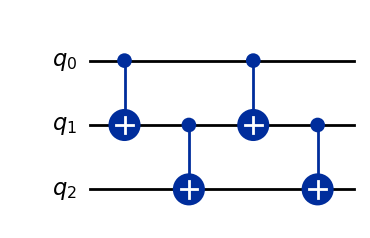

In [53]:
sub_circuit.draw(output='mpl')

In [54]:
toggle_cx = sub_circuit.to_instruction()

In [55]:
qr = QuantumRegister(4)

In [56]:
new_qc = QuantumCircuit(qr)

In [57]:
new_qc.append(toggle_cx, [qr[1], qr[2], qr[3]])

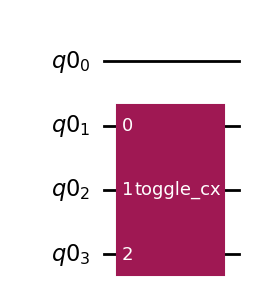

In [58]:
new_qc.draw(output='mpl')

In [59]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

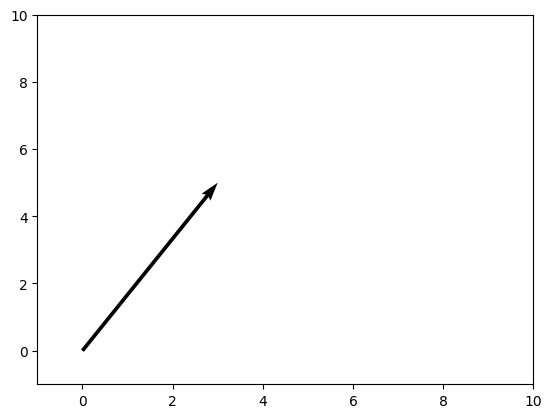

In [60]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

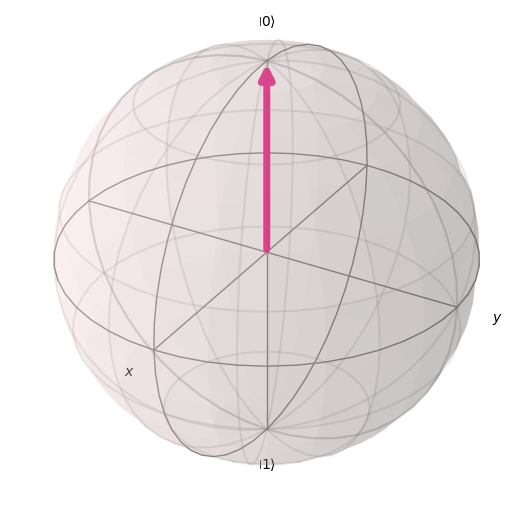

In [61]:
plot_bloch_vector([0, 0, 1])

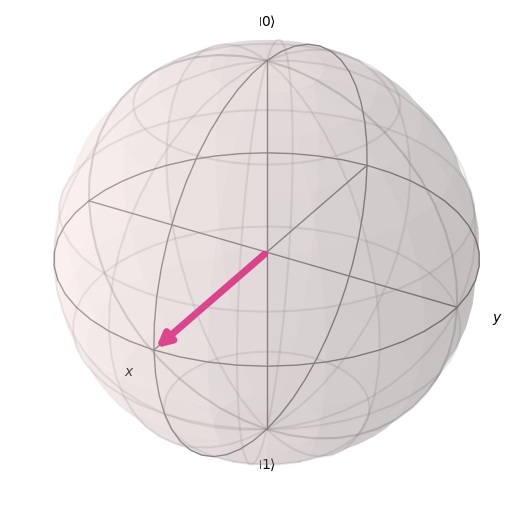

In [62]:
plot_bloch_vector([1, 0, 0])

In [63]:
from qiskit_aer import Aer

In [64]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [65]:
n = 8
n_q = 8
n_b = 8
qc_output = QuantumCircuit(n_q, n_b)

In [66]:
for j in range(n):
  qc_output.measure(j, j)

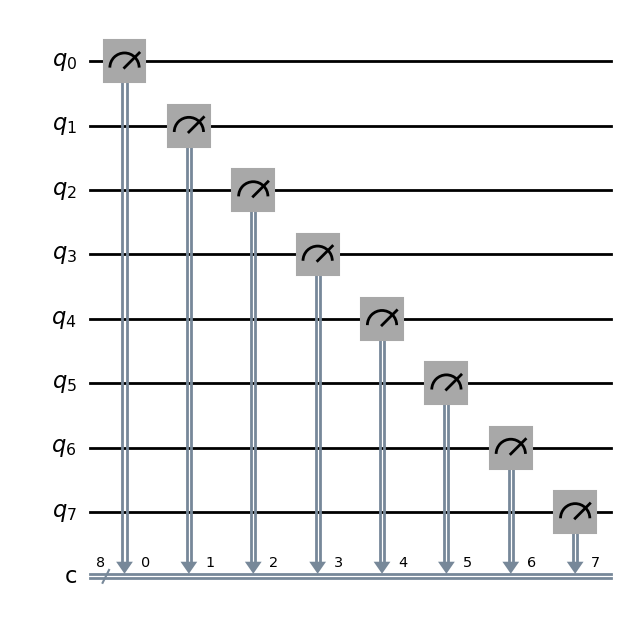

In [67]:
qc_output.draw(output='mpl')

In [68]:
counts = Aer.get_backend('qasm_simulator').run(qc_output).result().get_counts()

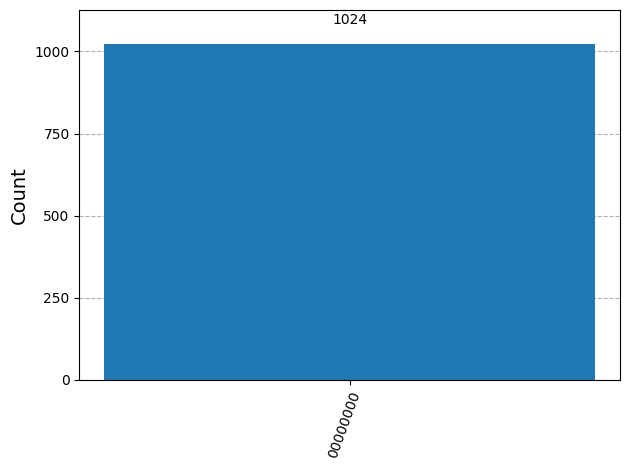

In [69]:
plot_histogram(counts)

In [70]:
qn_encode  = QuantumCircuit(n)

In [71]:
qn_encode.x(7)

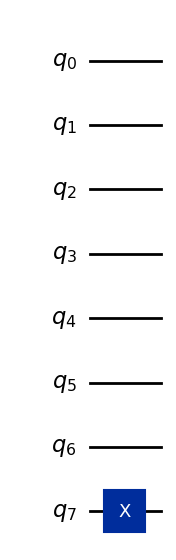

In [72]:
qn_encode.draw(output='mpl')

In [73]:
qc = qn_encode.compose(qc_output)

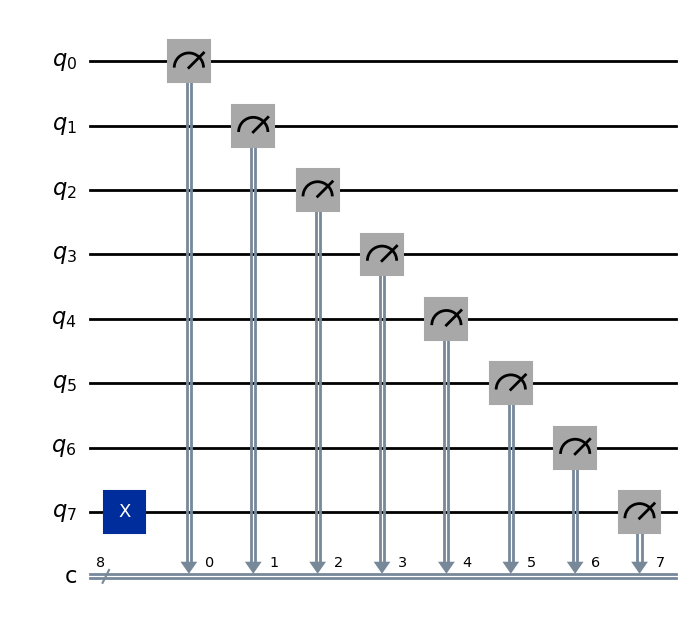

In [74]:
qc.draw(output='mpl')

In [75]:
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()

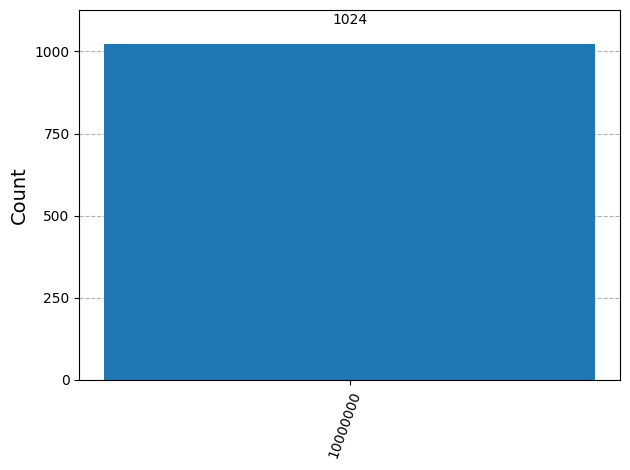

In [76]:
plot_histogram(counts)

In [77]:
qc_encode = QuantumCircuit(n)

In [78]:
qc_encode.x(1)

In [79]:
qc_encode.x(5)

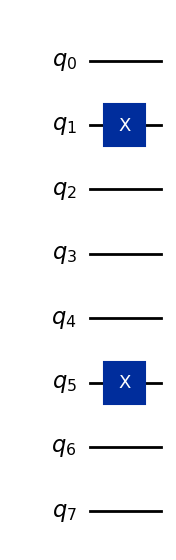

In [80]:
qc_encode.draw(output='mpl')

In [81]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)

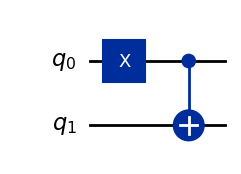

In [82]:
qc.draw(output='mpl')

In [83]:
state_vector = Aer.get_backend('statevector_simulator').run(qc).result().get_statevector()

In [84]:
state_vector

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


C:\Users\clari\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\clari\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\clari\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:1854: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


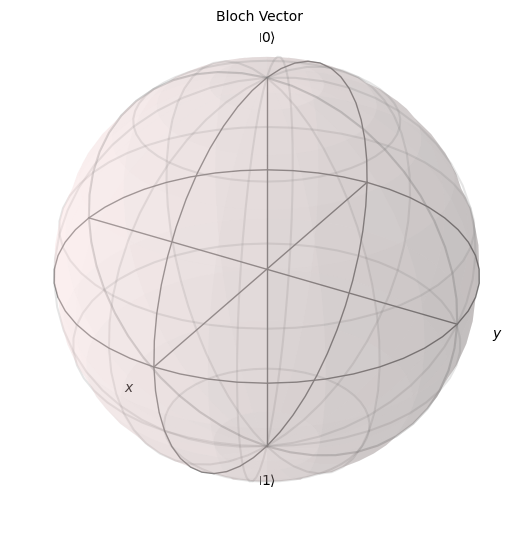

In [85]:
plot_bloch_vector(state_vector, title='Bloch Vector')

In [86]:
n = 8
n_q = 8
n_b = 8
qc_output = QuantumCircuit(n_q, n_b)

In [87]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

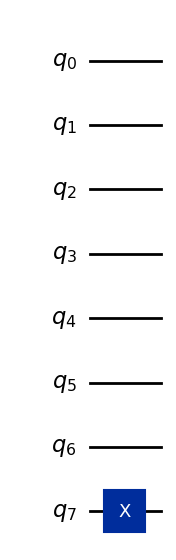

In [88]:
qc_encode.draw(output='mpl')

In [89]:
qc_encode.measure_all()

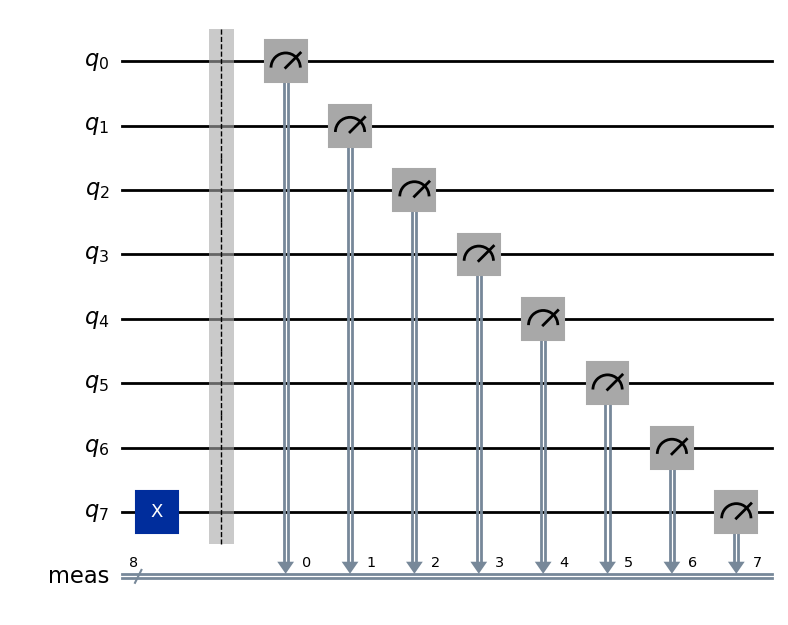

In [90]:
qc_encode.draw(output='mpl')

In [91]:
from qiskit_aer import Aer

In [92]:
counts = Aer.get_backend('qasm_simulator').run(qc_encode, shots=1024).result().get_counts()

In [93]:
from qiskit.visualization import plot_histogram

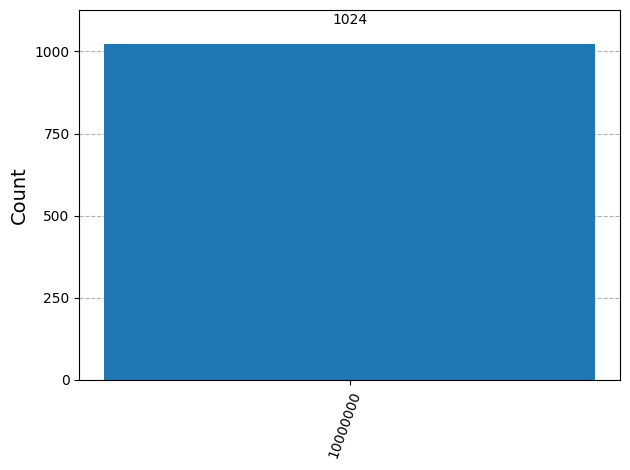

In [94]:
plot_histogram(counts)

In [95]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

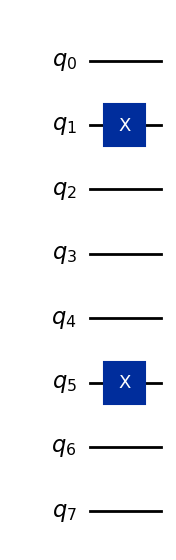

In [96]:
qc_encode.draw(output='mpl')

In [97]:
qc_encode.measure_all()

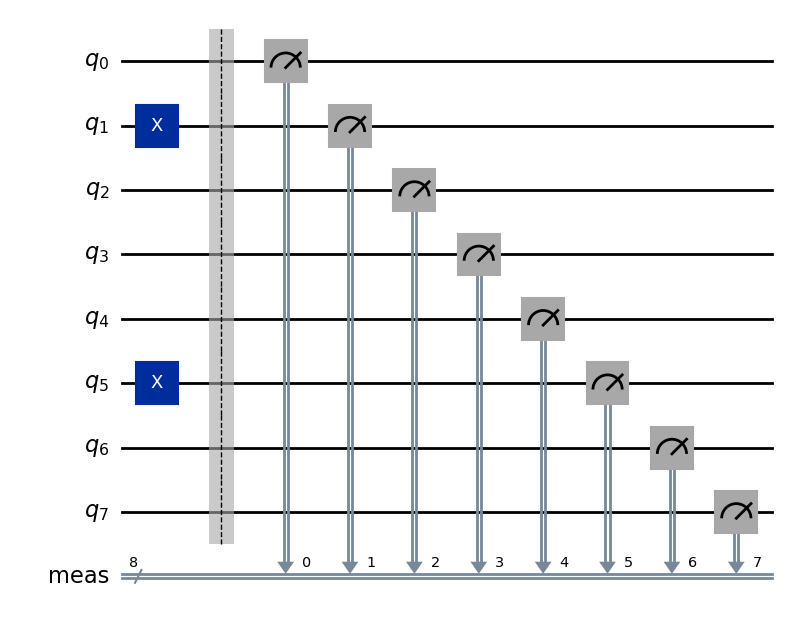

In [98]:
qc_encode.draw(output='mpl')

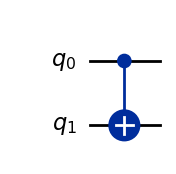

In [99]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1)
qc_cnot.draw(output='mpl')

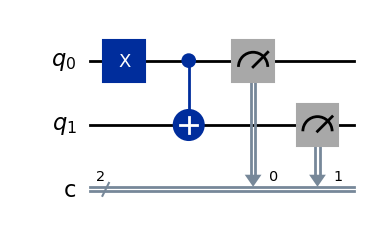

In [100]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output='mpl')

In [101]:
job = Aer.get_backend('qasm_simulator').run(qc, shots=1024)

In [102]:
job.result()

Result(backend_name='qasm_simulator', backend_version='0.17.1', job_id='00fff9c5-700c-4008-9ba4-e66cf2b3e695', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1024}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-188', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=1075404761, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0026435, 'sample_measure_time': 0.0004934, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16072, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 20, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0026435)], date=2025-08-21T19:22:54.877989, stat

In [103]:
job.result().get_counts()

{'11': 1024}

# Half Adder

In [104]:
qc_ha = QuantumCircuit(4, 2)

In [105]:
qc_ha.x(0)
qc_ha.x(1)

In [106]:
qc_ha.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

In [107]:
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

In [108]:
qc_ha.measure(2, 0)
qc_ha.measure(3, 0)

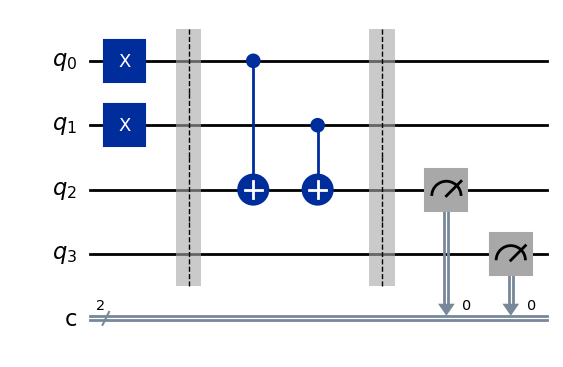

In [109]:
qc_ha.draw(output='mpl')

In [110]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

In [111]:
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)

In [112]:
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

In [113]:
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

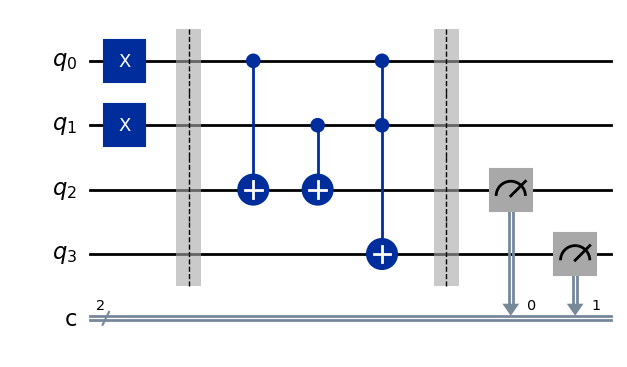

In [114]:
qc_ha.draw(output='mpl')

In [115]:
counts = Aer.get_backend('qasm_simulator').run(qc_ha, shots=1024).result().get_counts() 

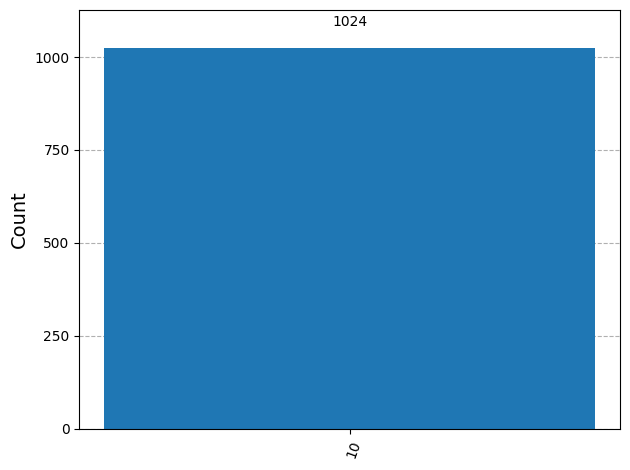

In [116]:
plot_histogram(counts)

Difference Between Z and X measurement

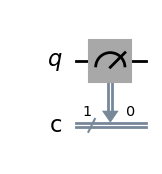

In [117]:
measure_z = QuantumCircuit(1, 1)
measure_z.measure(0, 0)
measure_z.draw(output='mpl')

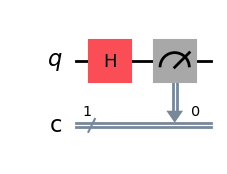

In [118]:
measure_x  = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0, 0)

measure_x.draw(output='mpl')

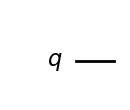

In [119]:
qc_0 = QuantumCircuit(1)
qc_0.draw(output='mpl')

In [120]:
qc = qc_0.compose(measure_z)

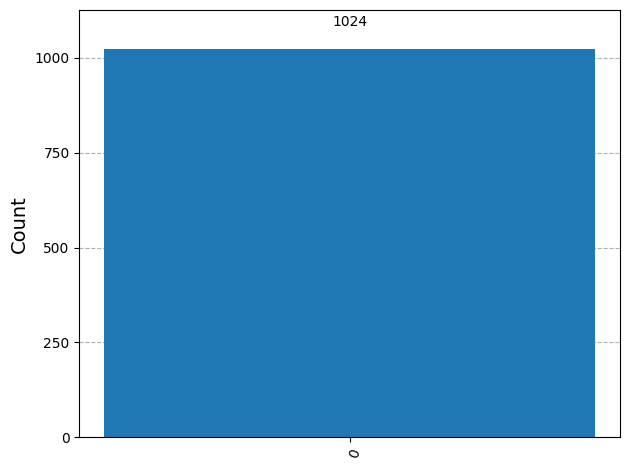

In [121]:
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)

In [122]:
qc = qc_0.compose(measure_x)

In [123]:
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()

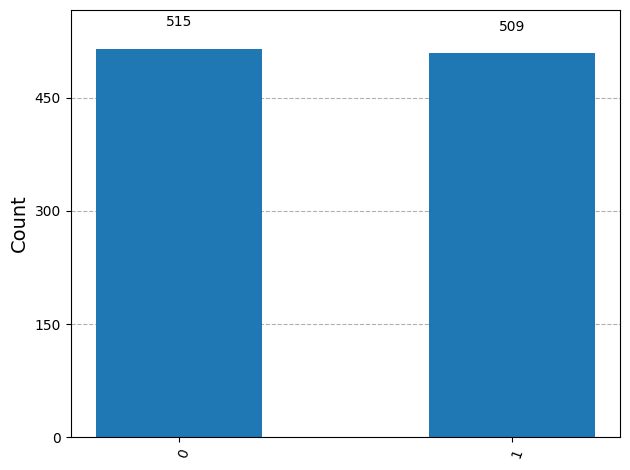

In [124]:
plot_histogram(counts)

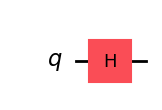

In [125]:
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
qc_plus.draw(output='mpl')

results for z measurement:


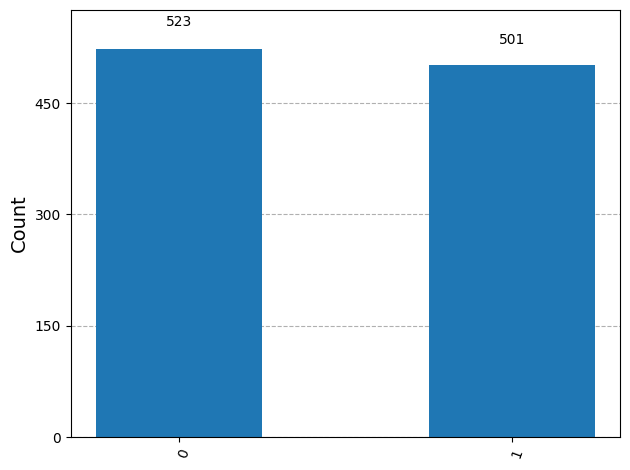

In [126]:
qc = qc_plus.compose(measure_z)
qc.draw(output='mpl')
print('results for z measurement:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)

results for x measurement:


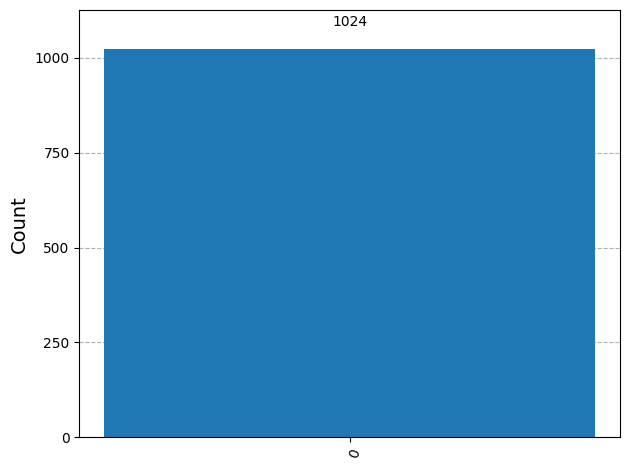

In [127]:
qc = qc_plus.compose(measure_x)
print('results for x measurement:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)

here we saw that z measurement is random for this ckt  and x measurement is certain that output is 0. The results are different for what we saw for the empty circuit. the hadamard has lead to an entirely opposite set of outcomes

#### Using the other ckts we can manipulate them in different ways.

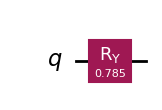

In [128]:
qc_y = QuantumCircuit(1)
qc_y.ry(3.14159/4, 0)  # Rotate around Y-axis by 45 degrees (π/4 radians)
qc_y.draw(output='mpl')

results for z measurement:


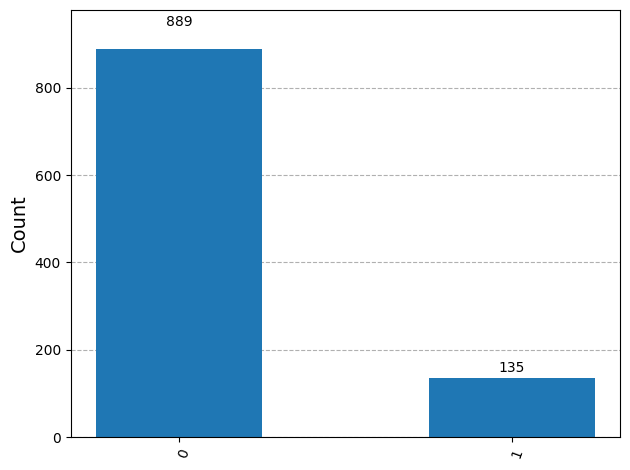

In [129]:
qc = qc_y.compose(measure_z)
print('results for z measurement:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)

results for x measurement:


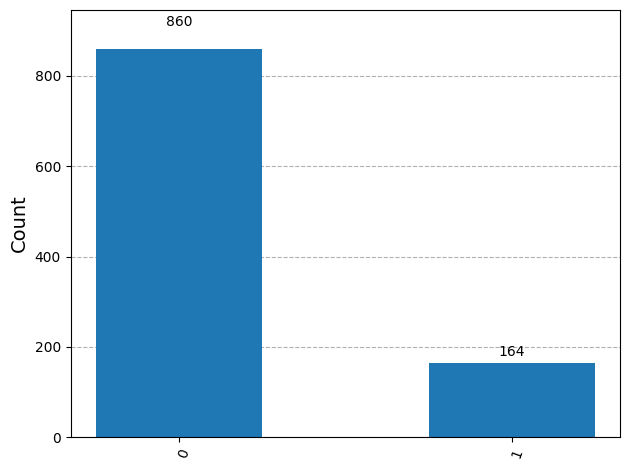

In [130]:
qc = qc_y.compose(measure_x)
print('results for x measurement:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)

These results hint at an important principle: Qubits have a limited amount of certainity that they can hold. This ensures that, despite the different ways we can extract outputs from a qubit, it can only be used to store a single bit of information.